# **Install important Libraries**

In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install plotly


# **Importing Important Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# **Uploading File in xlxs Format**

In [11]:
df = pd.read_excel('/content/Sales_Data.xlsx')

df.sample(3) #---- Checking data

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
23294,29844,IN-2011-23208,2011-07-20,2011-07-24,Standard Class,AS-10225,Alan Schoenberger,Corporate,Ho Chi Minh City,Ho Chí Minh City,...,OFF-FA-10003819,Office Supplies,Fasteners,"Advantus Paper Clips, Assorted Sizes",57.8925,5,0.17,11.8425,9.46,High
48821,49534,MO-2013-5150,2013-11-12,2013-11-18,Standard Class,CS-1845,Cari Sayre,Corporate,Casablanca,Grand Casablanca,...,OFF-AVE-10000802,Office Supplies,Labels,"Avery Removable Labels, Adjustable",8.6400,1,0.00,3.9600,0.59,Medium
32494,35668,US-2013-165078,2013-11-06,2013-11-11,Standard Class,MA-17995,Michelle Arnett,Home Office,Lawrence,Indiana,...,OFF-LA-10000414,Office Supplies,Labels,Avery 503,51.7500,5,0.00,24.8400,4.47,High


# **Cleaning and Transforming Data**

In [12]:
# Checking Null Values
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [13]:
# We do not require Postal Code Column so remove it as it has null values
df = df.drop(columns='Postal Code')

In [14]:
# Checking Null value again
df.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
City,0
State,0


In [15]:
# Checking Duplicate
df.duplicated().sum()

0

In [16]:
# checking How many Rows and Columns we have
df.shape

(51290, 23)

In [17]:
df['Order Priority'].value_counts()

,count
Order Priority,
Medium,29433
High,15501
Critical,3932
Low,2424


# **Extracting Important Insights**

In [120]:
print("Total Sales: ",f"${df['Sales'].sum():.2f}")
print("Quantity: ",f"{df['Quantity'].sum():.2f}")
print("Discount: ",f"{df['Discount'].sum():.2f}")
print("Profit: ",f"{df['Profit'].sum():.2f}")

Total Sales:  $12642501.91
Quantity:  178312.00
Discount:  7329.73
Profit:  1467457.29


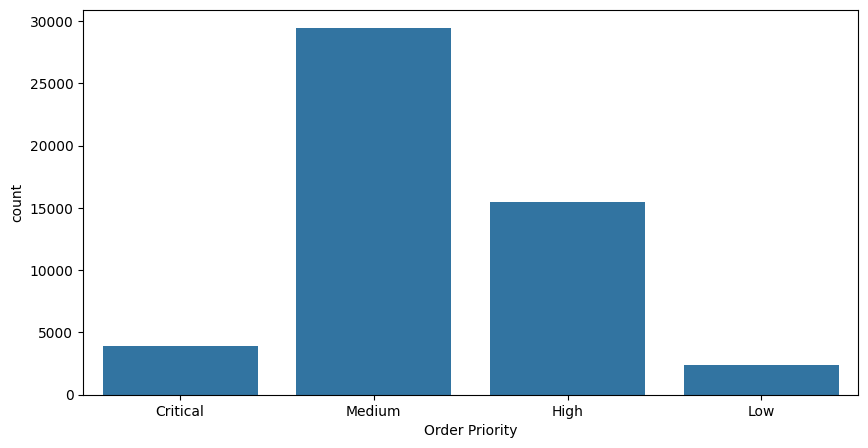

In [48]:
# Order Priority
plt.figure(figsize=(10,5))
sns.countplot(x= "Order Priority", data=df)
plt.show()

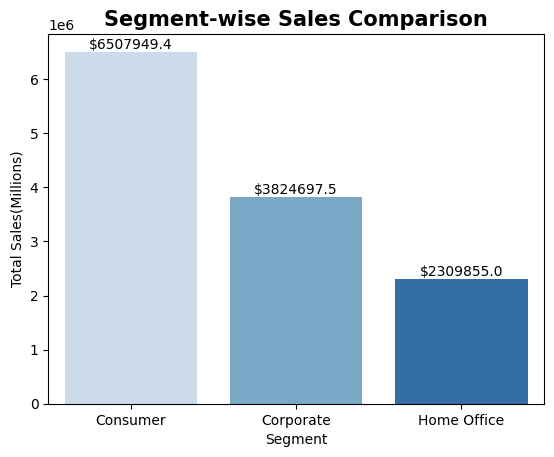

In [105]:
# Segment wise sale
segment_sales = df.groupby('Segment')['Sales'].sum().reset_index()

sns.barplot(x='Segment', y='Sales', data=segment_sales, palette='Blues', hue='Segment')

# Adding title and labels
plt.title('Segment-wise Sales Comparison', fontweight = 'bold', fontsize = 15)
plt.xlabel('Segment')
plt.ylabel('Total Sales(Millions)')

for i,j in enumerate(segment_sales['Sales']):
    plt.text(i, j, f'${j:.1f}', ha='center', va='bottom')

# Display the plot
plt.xticks(rotation=0)
plt.show()



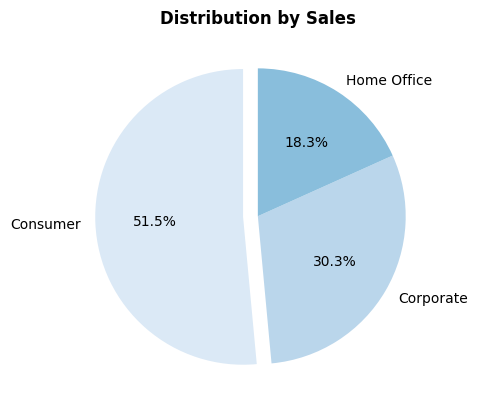

In [109]:
 # Distribution by Sales

 plt.pie(segment_sales['Sales'], labels=segment_sales['Segment'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Blues'), explode=(0.1,0,0))
 plt.title('Distribution by Sales', fontweight = 'bold')
 plt.show()

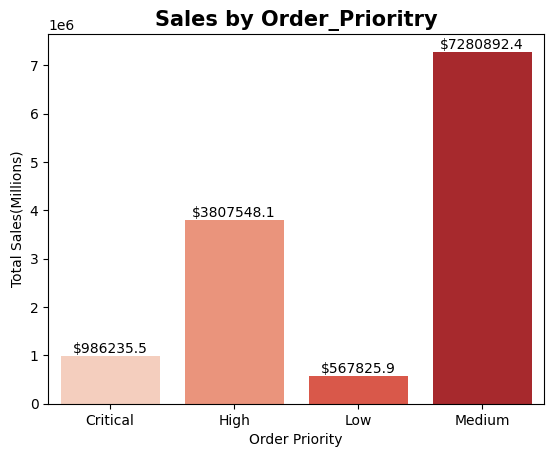

In [95]:
# Sales by Order_Prioritry
orderpriority_sales = df.groupby('Order Priority')['Sales'].sum().reset_index()

sns.barplot(x='Order Priority', y='Sales', data=orderpriority_sales, palette='Reds', hue='Order Priority')

# Adding title and labels
plt.title('Sales by Order_Prioritry', fontweight = 'bold', fontsize = 15)
plt.xlabel('Order Priority')
plt.ylabel('Total Sales(Millions)')

for i,j in enumerate(orderpriority_sales['Sales']):
    plt.text(i, j, f'${j:.1f}', ha='center', va='bottom')

# Display the plot
plt.xticks(rotation=0)
plt.show()


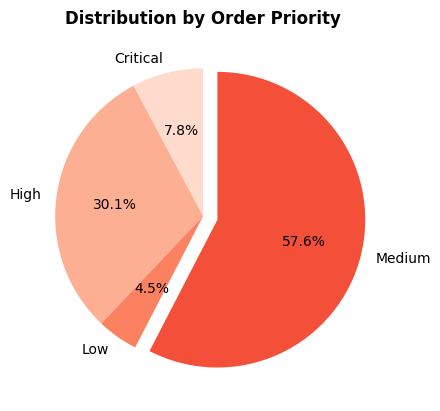

In [111]:
 # Distribution by Order Priority

plt.pie(orderpriority_sales['Sales'], labels=orderpriority_sales['Order Priority'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Reds'), explode=(0,0,0,0.1))
plt.title('Distribution by Order Priority', fontweight = 'bold')
plt.show()

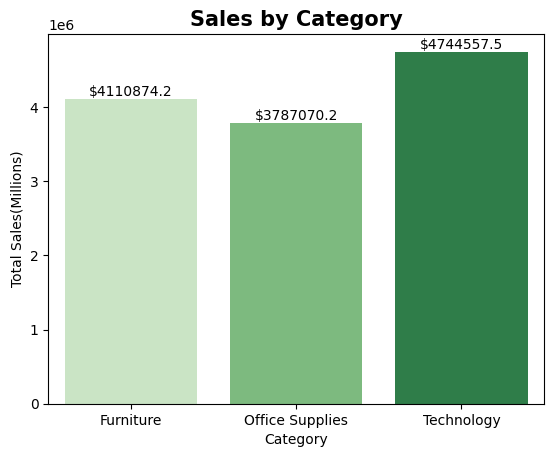

In [96]:
# Sales by Category
Category_sales = df.groupby('Category')['Sales'].sum().reset_index()

sns.barplot(x='Category', y='Sales', data=Category_sales, palette='Greens', hue='Category')
# Adding title and labels
plt.title('Sales by Category', fontweight = 'bold', fontsize = 15)
plt.xlabel('Category')
plt.ylabel('Total Sales(Millions)')

for i,j in enumerate(Category_sales['Sales']):
    plt.text(i, j, f'${j:.1f}', ha='center', va='bottom')

# Display the plot
plt.xticks(rotation=0)
plt.show()


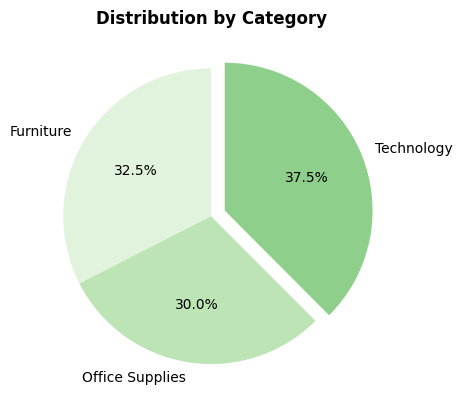

In [113]:
# Distribution by Category

plt.pie(Category_sales['Sales'], labels=Category_sales['Category'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Greens'), explode=(0,0,0.1))
plt.title('Distribution by Category', fontweight = 'bold')
plt.show()

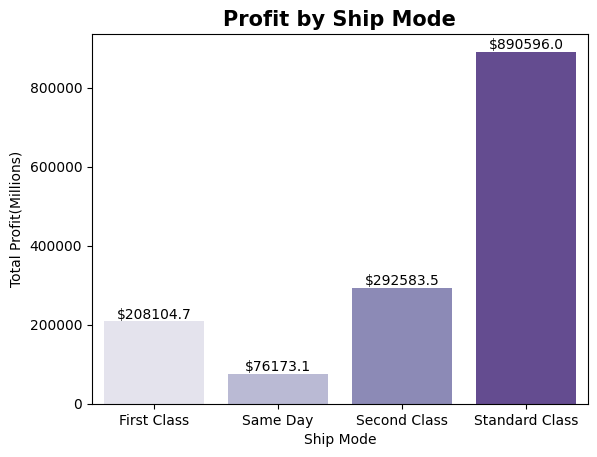

In [123]:
# Profit By Shiping Mode

Shipmode_profit = df.groupby('Ship Mode')['Profit'].sum().reset_index()

# Plot Profit by Shipmode
sns.barplot(x='Ship Mode', y='Profit', data=Shipmode_profit, palette='Purples', hue='Ship Mode')
plt.title('Profit by Ship Mode', fontweight = 'bold', fontsize = 15)
plt.xlabel('Ship Mode')
plt.ylabel('Total Profit(Millions)')

for i,j in enumerate(Shipmode_profit['Profit']):
    plt.text(i, j, f'${j:.1f}', ha='center', va='bottom')

# Display the plot
plt.xticks(rotation=0)
plt.show()

In [167]:
# Order_Ships by Ship mode
df['Ship Mode'].value_counts()

,count
Ship Mode,
Standard Class,30775
Second Class,10309
First Class,7505
Same Day,2701


In [149]:
# Highest and Lowest Shipping Cost by Country

Shippingcost_country = df.groupby('Country')['Shipping Cost'].agg(['max', 'min']).reset_index()


# Ploting Highest and Lowest Shiping Cost Contry wise
fig = px.choropleth(Shippingcost_country,
                    locations='Country',
                    locationmode='country names',
                    color='max',
                    hover_name='Country',
                    color_continuous_scale='Viridis',
                    title='Highest and Lowest Shipping Cost by Country')

fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'))
fig.update_layout(title_font_family="Arial", title_font_size=20, title_font_color="black")
fig.show()



In [181]:
# Sales and Profit by city top 10

df.groupby('City')['Sales'].sum().nlargest(10)

,Sales
City,
New York City,256368.16100
Los Angeles,175851.34100
Manila,120886.94850
Seattle,119540.74200
San Francisco,112669.09200
Philadelphia,109077.01300
Sydney,101945.51700
Jakarta,94321.32420
London,86945.80500


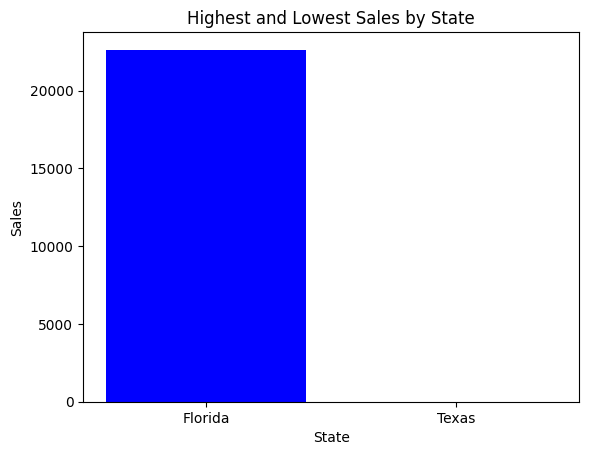

In [164]:
# Highest and Lowest Sales by Country

# Find the highest and lowest sales
highest_sales = df.loc[df['Sales'].idxmax()]
lowest_sales = df.loc[df['Sales'].idxmin()]

# Prepare data for plotting
states = [highest_sales['State'], lowest_sales['State']]
sales = [highest_sales['Sales'], lowest_sales['Sales']]

# Plotting the bar graph
plt.bar(states, sales, color=['blue', 'red'])

# Adding title and labels
plt.title('Highest and Lowest Sales by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.show()





